# Postprocessing CAN data for other use
## with an example to data generation for use in transfer test

In [11]:
from strym import strymread, strymmap
import pandas as pd
import strym
strym.config['interactive'] = False
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
s.candb

NameError: name 's' is not defined

## Let's read all the data and make a quick plot

[2021_06_08_14_58_44] (root) INFO: Reading GPS file ../PandaData/2020_07_08/2020-07-08-15-15-54_2T3MWRFVXLW056972_GPS_Messages.csv
[2021_06_08_14_58_44] (numexpr.utils) INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2021_06_08_14_58_44] (numexpr.utils) INFO: NumExpr defaulting to 8 threads.
GPS signal first acquired at 2020-07-08 20:16:10:100000
[2021_06_08_14_58_51] (root) INFO: Vehicle model infered is toyota-rav4-2020
[2021_06_08_14_59_09] (cantools.database.can.database) WARNING: Overwriting message 'GAS_PEDAL' with 'GAS_PEDAL' in the name to message dictionary.
[2021_06_08_14_59_29] (root) INFO: Found Hybrid RAV4 where acceleration messages are 4  bytes.
data not 8 bytes
                                       Time  Message  Bus
Clock                                                    
2020-07-08 22:15:55.252162816  1.594247e+09    0.000  0.0
2020-07-08 22:15:55.252162816  1.594247e+09    0.000  0.0
2020-07-08 22:15:55.252162

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3620: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[2021_06_08_14_59_34] (matplotlib.legend) WARNING: No handles with labels found to put in legend.


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3620: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



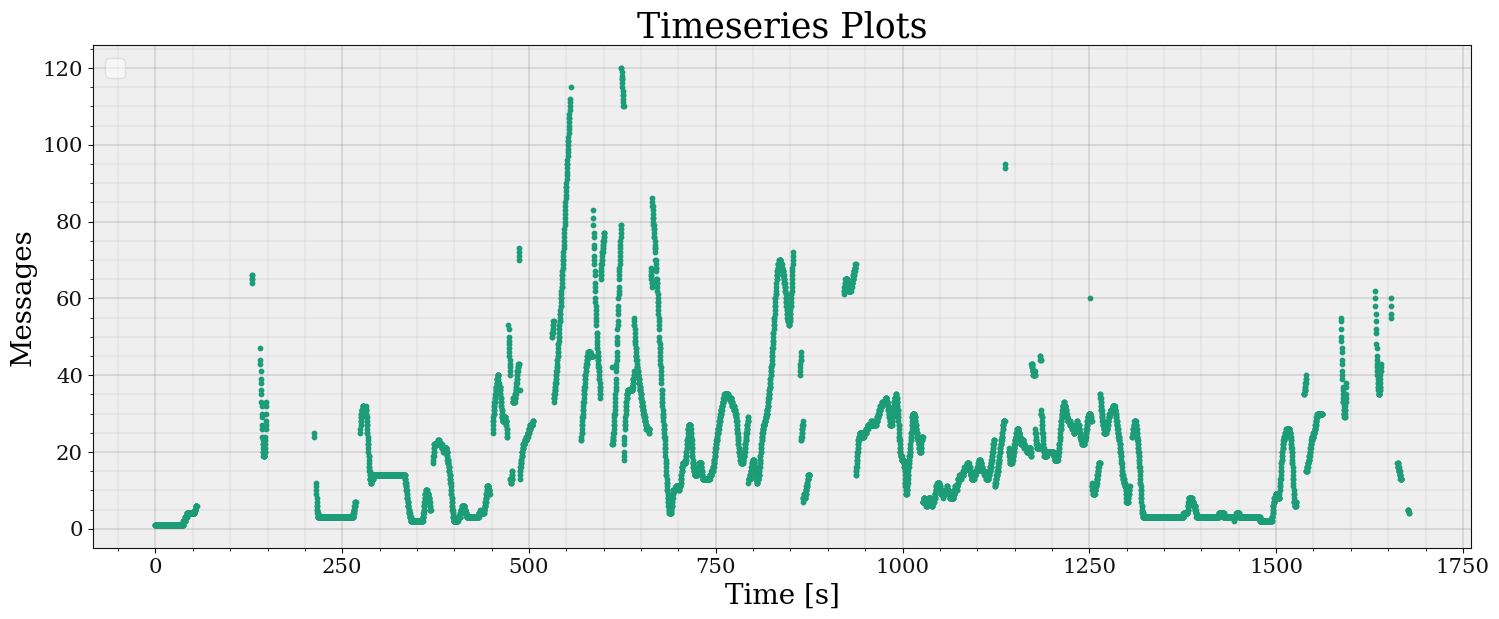

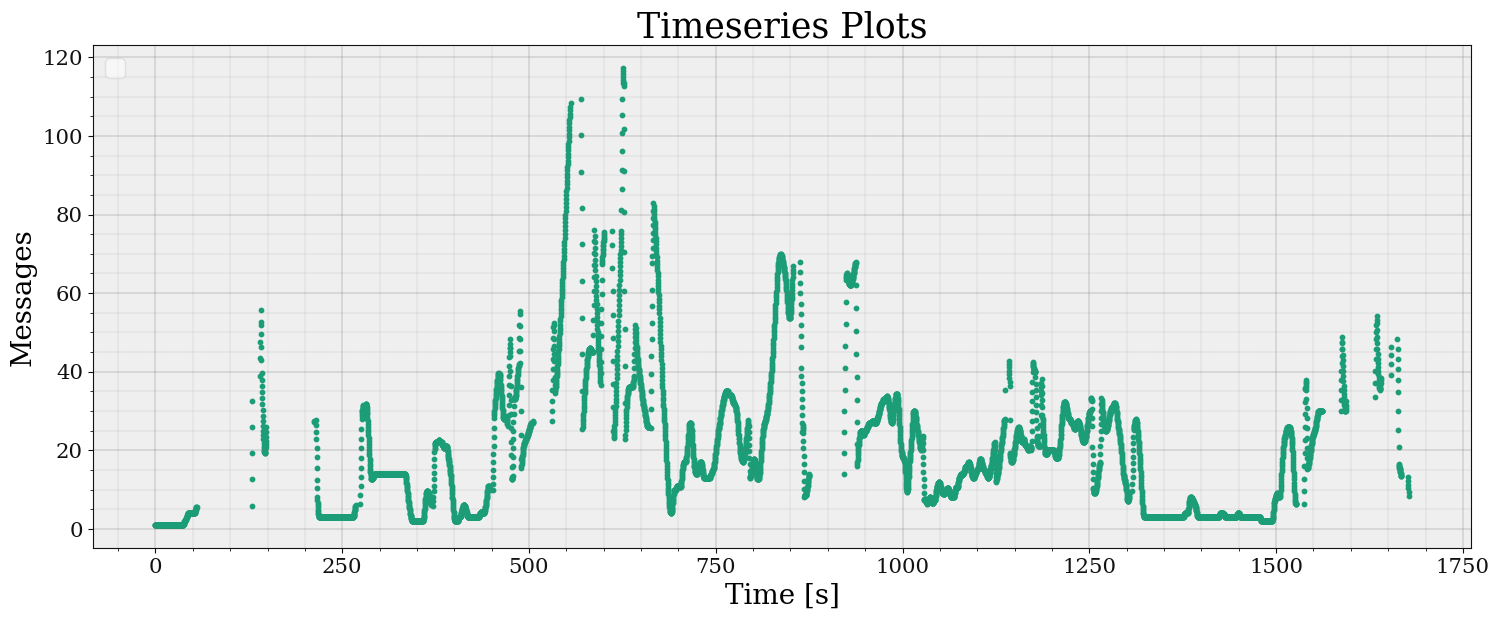

In [2]:
folder = '../PandaData/2020_07_08/'
g = strymmap(csvfile=folder + "2020-07-08-15-15-54_2T3MWRFVXLW056972_GPS_Messages.csv")
s = strymread(csvfile=folder + "2020-07-08-15-15-54_2T3MWRFVXLW056972_CAN_Messages.csv")

speed = s.speed()
speed['Message'] = speed['Message']*0.277778
rel_vel = s.relative_leadervel()
acceleration = s.accelx() # This is the acceleration we need
lead_dist =  s.lead_distance()
lead_dist1 = lead_dist[lead_dist['Message'] < 200]
strymread.scatterts([lead_dist1])
lead_dist1 = strymread.denoise(lead_dist1)
strymread.scatterts([lead_dist1])

In [4]:
acceleration

,Time,Message
Clock,,
2020-07-08 22:15:55.252162816,1.594247e+09,0.000
2020-07-08 22:15:55.255700992,1.594247e+09,0.000
2020-07-08 22:15:55.257005056,1.594247e+09,0.000
2020-07-08 22:15:55.260482048,1.594247e+09,0.000
2020-07-08 22:15:55.262187008,1.594247e+09,0.000
...,...,...
2020-07-08 22:44:10.881673216,1.594248e+09,2.055
2020-07-08 22:44:10.906543872,1.594248e+09,1.765
2020-07-08 22:44:10.931587072,1.594248e+09,1.370


## we are divide lead distance signal into chunks since they are discontinuous in nature. We can differentiate each chunk to get the relative speed

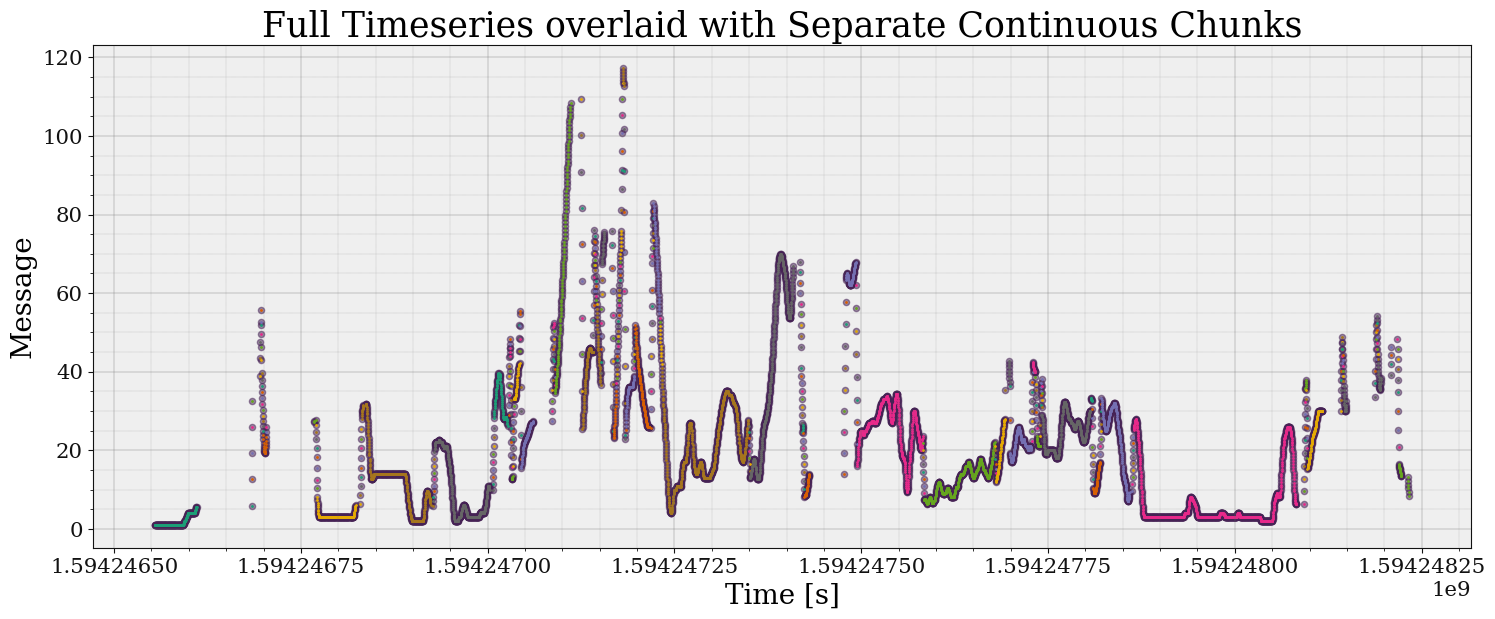

In [5]:
lead_dist_chunks = strymread.create_chunks(lead_dist1, plot=True, continuous_threshold=1.0)

## Differentiate the speed chunk

In [12]:
chunk_diff  = []
for chunks in lead_dist_chunks:
    chunk_diff.append( strymread.differentiate(chunks, method='S'))

## Combine all the chunks to get relative speed 

In [14]:
leaddist_diff = pd.concat(chunk_diff)
leaddist_diff

,Time,Message
Clock,,
2020-07-08 22:15:55.274049024,1.594247e+09,1.650678e-13
2020-07-08 22:15:55.291262976,1.594247e+09,-3.697370e-14
2020-07-08 22:15:55.308161024,1.594247e+09,-1.225116e-14
2020-07-08 22:15:55.326028032,1.594247e+09,5.848515e-14
2020-07-08 22:15:55.474577920,1.594247e+09,-6.557267e-14
...,...,...
2020-07-08 22:43:51.713197056,1.594248e+09,-5.014011e+00
2020-07-08 22:43:51.913217024,1.594248e+09,-4.926141e+00
2020-07-08 22:43:52.113017088,1.594248e+09,-3.669301e+00


## Plot the relative distance

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3138: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



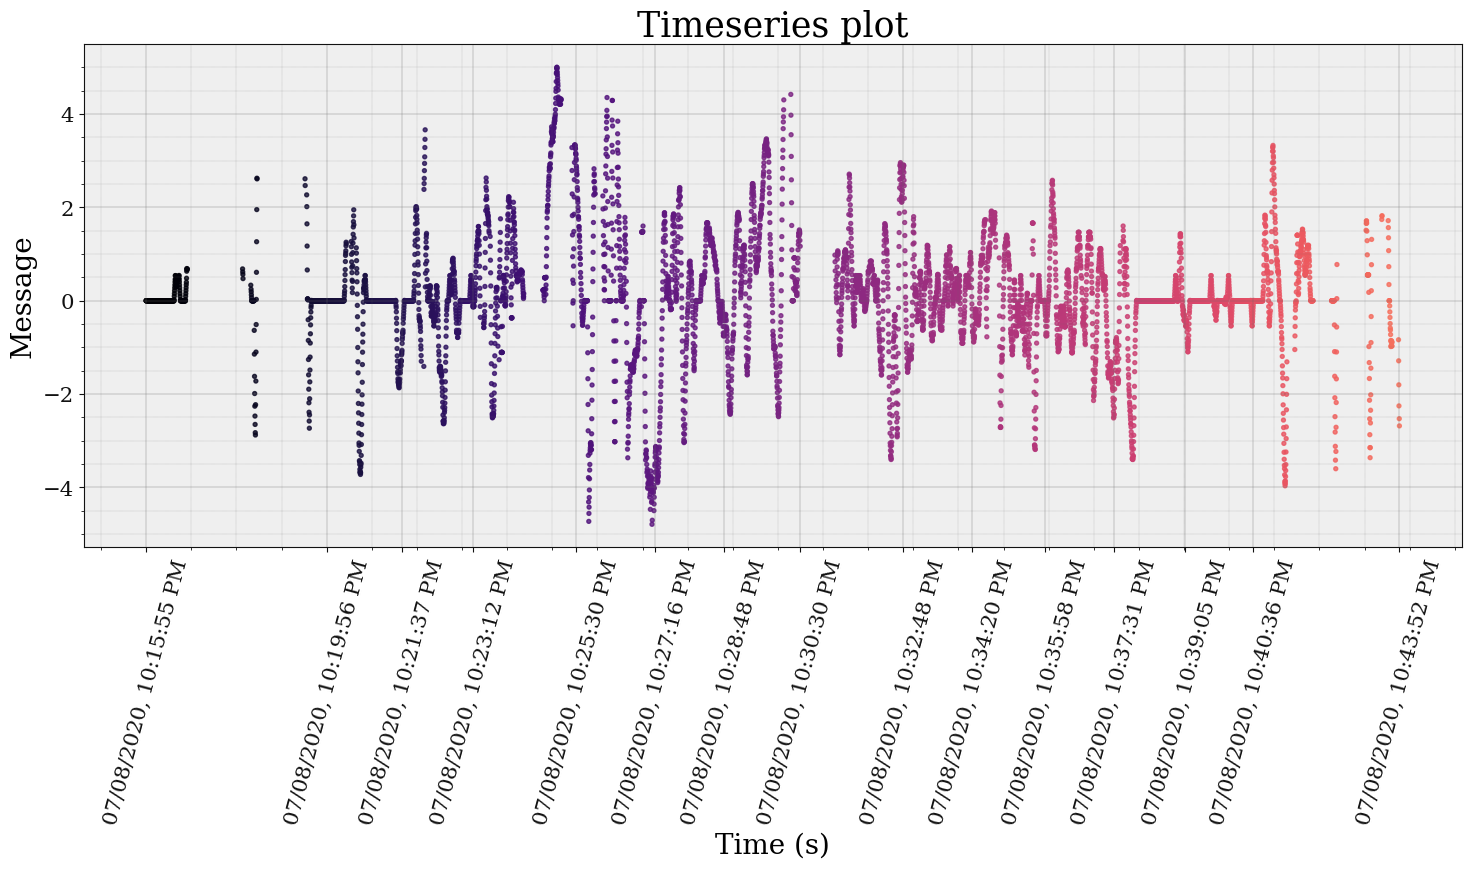

In [15]:
leaddist_diff = leaddist_diff[np.abs(leaddist_diff['Message']) < 40] 
leaddist_diff = strymread.denoise(leaddist_diff)
#eaddist_diff = strymread.denoise(leaddist_diff)
strymread.plt_ts(leaddist_diff)

## We are gonna now denoise the acceelration by three-pass filter

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3138: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



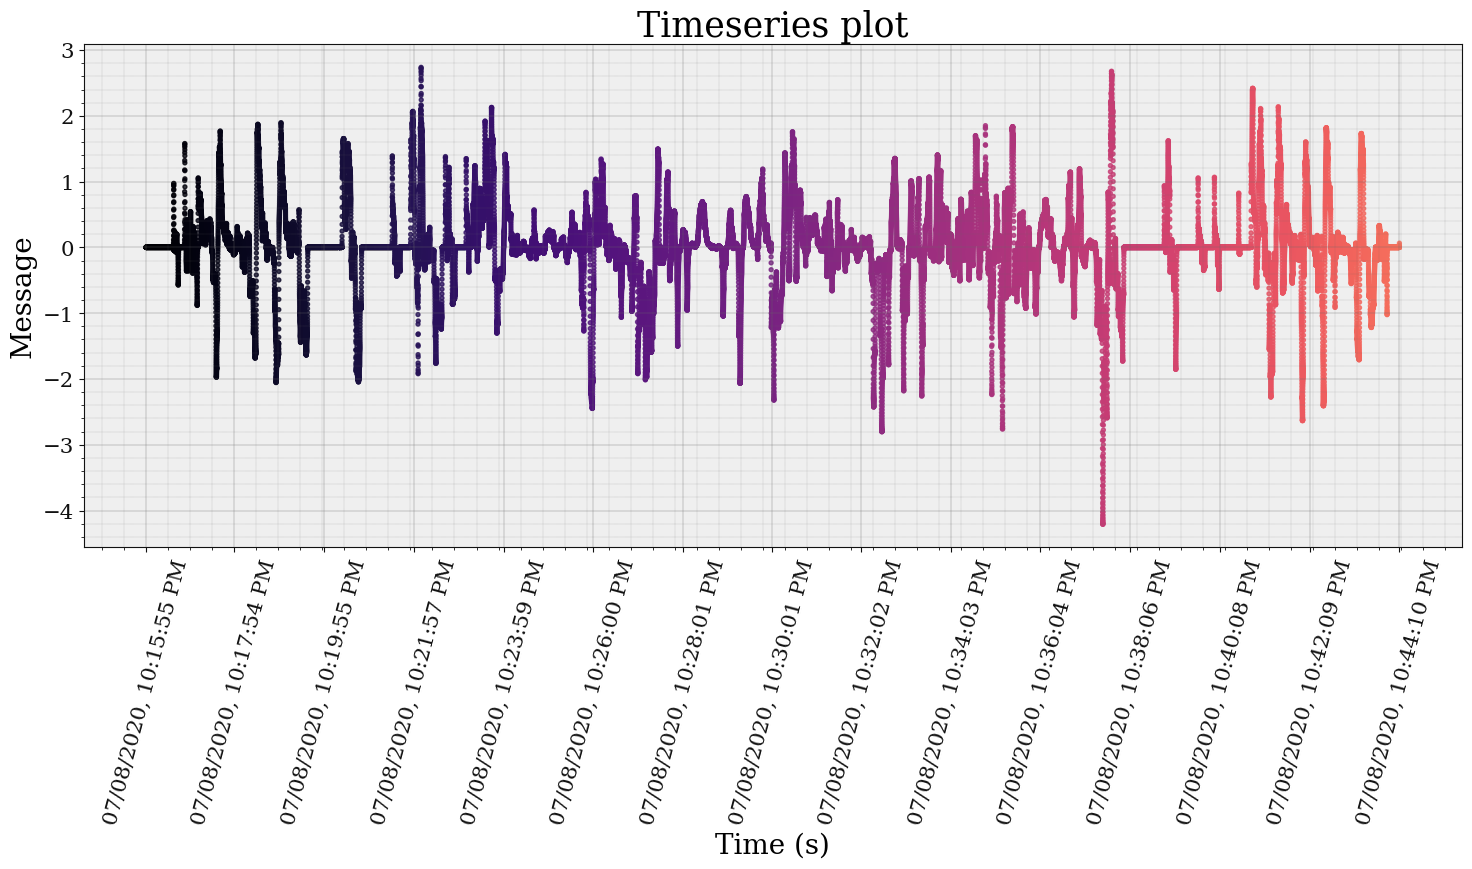

In [16]:
acceleration = strymread.denoise(acceleration)
acceleration = strymread.denoise(acceleration)
acceleration = strymread.denoise(acceleration)
strymread.plt_ts(acceleration)

## We will also denoise speed by three-pass filter

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3138: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



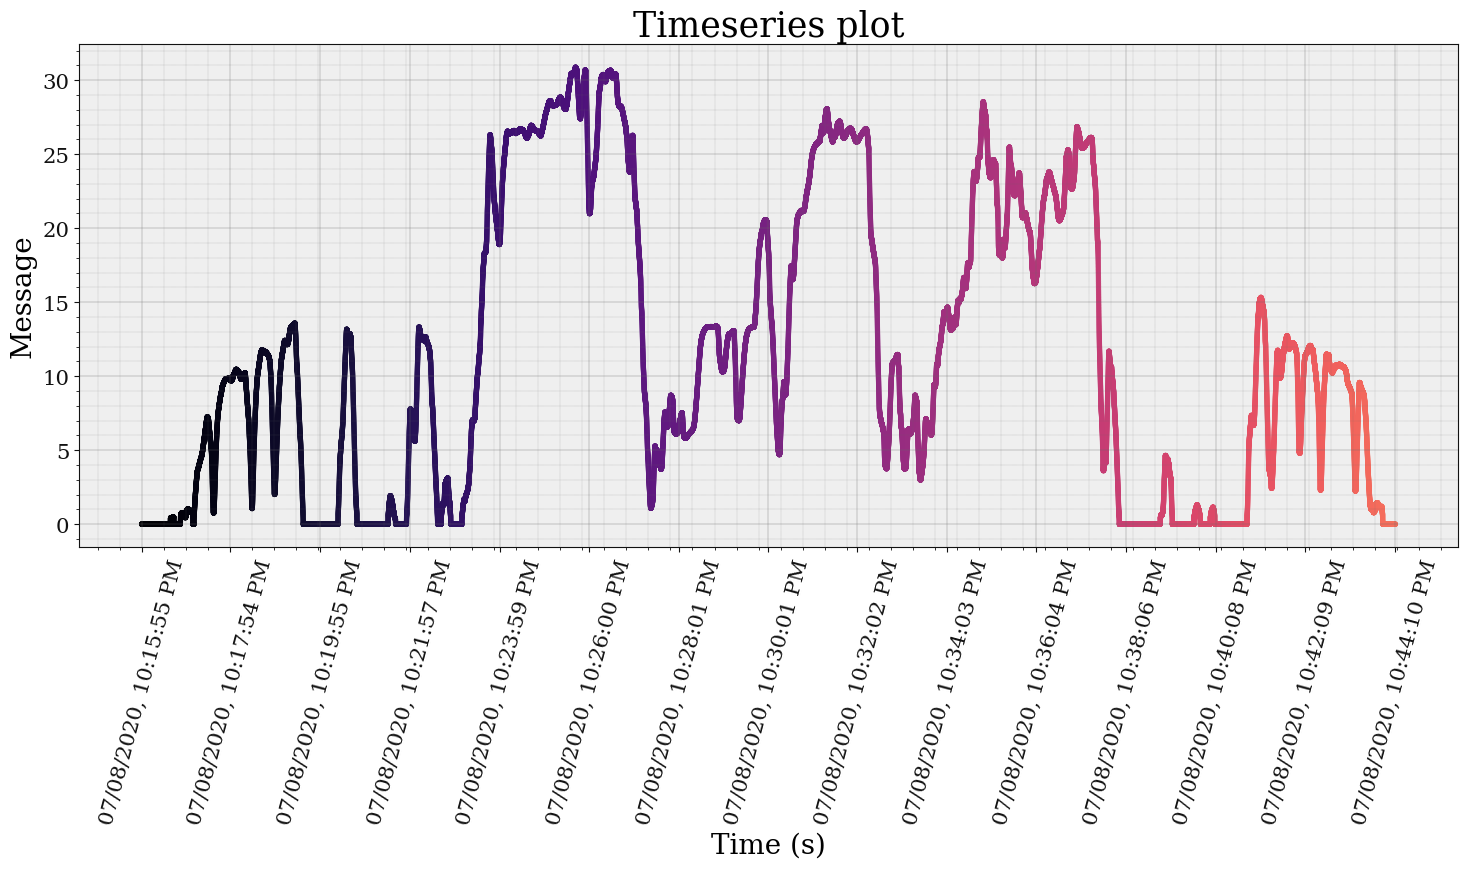

In [17]:
speed = strymread.denoise(speed)
speed = strymread.denoise(speed)
speed = strymread.denoise(speed)
strymread.plt_ts(speed)

## Resmaple and Synchronize Spee and Relative Velocity
### Note that currently strymread supports synchronizing two timeseries at a time, so you need to call  `ts_sync` multiple times to sync all timeseries - but remember to check length of output dataframe 

In [18]:
speed_resampled, relative_vel_resampled = strymread.ts_sync(speed, leaddist_diff, rate = 40, method='linear')


In [19]:
speed_resampled.shape

(67097, 2)

In [20]:
relative_vel_resampled.shape

(67097, 2)

In [21]:
_, lead_dist_resampled = strymread.ts_sync(speed, lead_dist1, rate = 40, method='linear')


In [22]:
lead_dist_resampled.shape

(67097, 2)

In [23]:
_, acceleration_resampled = strymread.ts_sync(leaddist_diff, acceleration, rate = 40, method='linear')


In [24]:
acceleration_resampled.shape

(67097, 2)

## Let's make a quick scatter plot 

[2021_06_08_15_16_43] (matplotlib.legend) WARNING: No handles with labels found to put in legend.


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3620: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



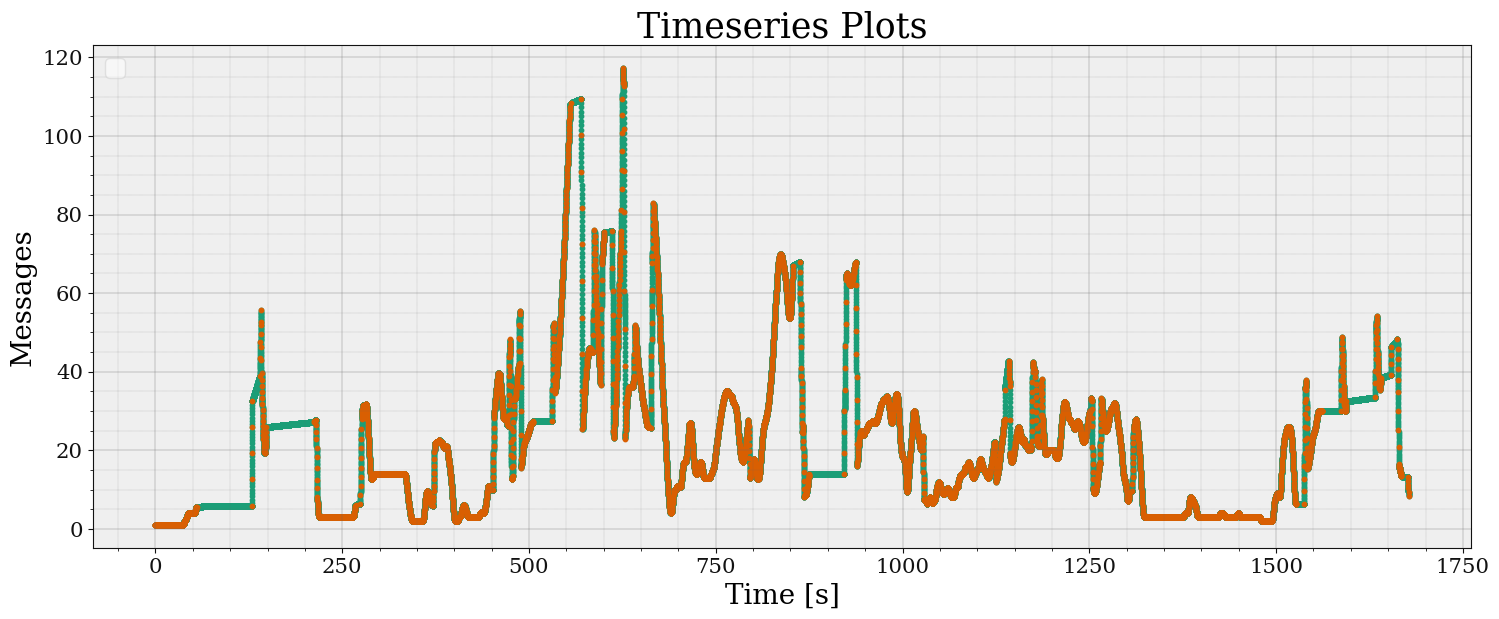

In [25]:
strymread.scatterts([lead_dist_resampled, lead_dist1], stacked=True)

## How can I get leader's velocity: Well just add relative vel to ego's vel

In [26]:
leader_vel = pd.DataFrame()
leader_vel['Time'] = speed_resampled['Time'].values
leader_vel['Message'] = speed_resampled['Message'].values + relative_vel_resampled['Message'].values

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/strym-0.4.6-py3.7.egg/strym/strymread.py:3643: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



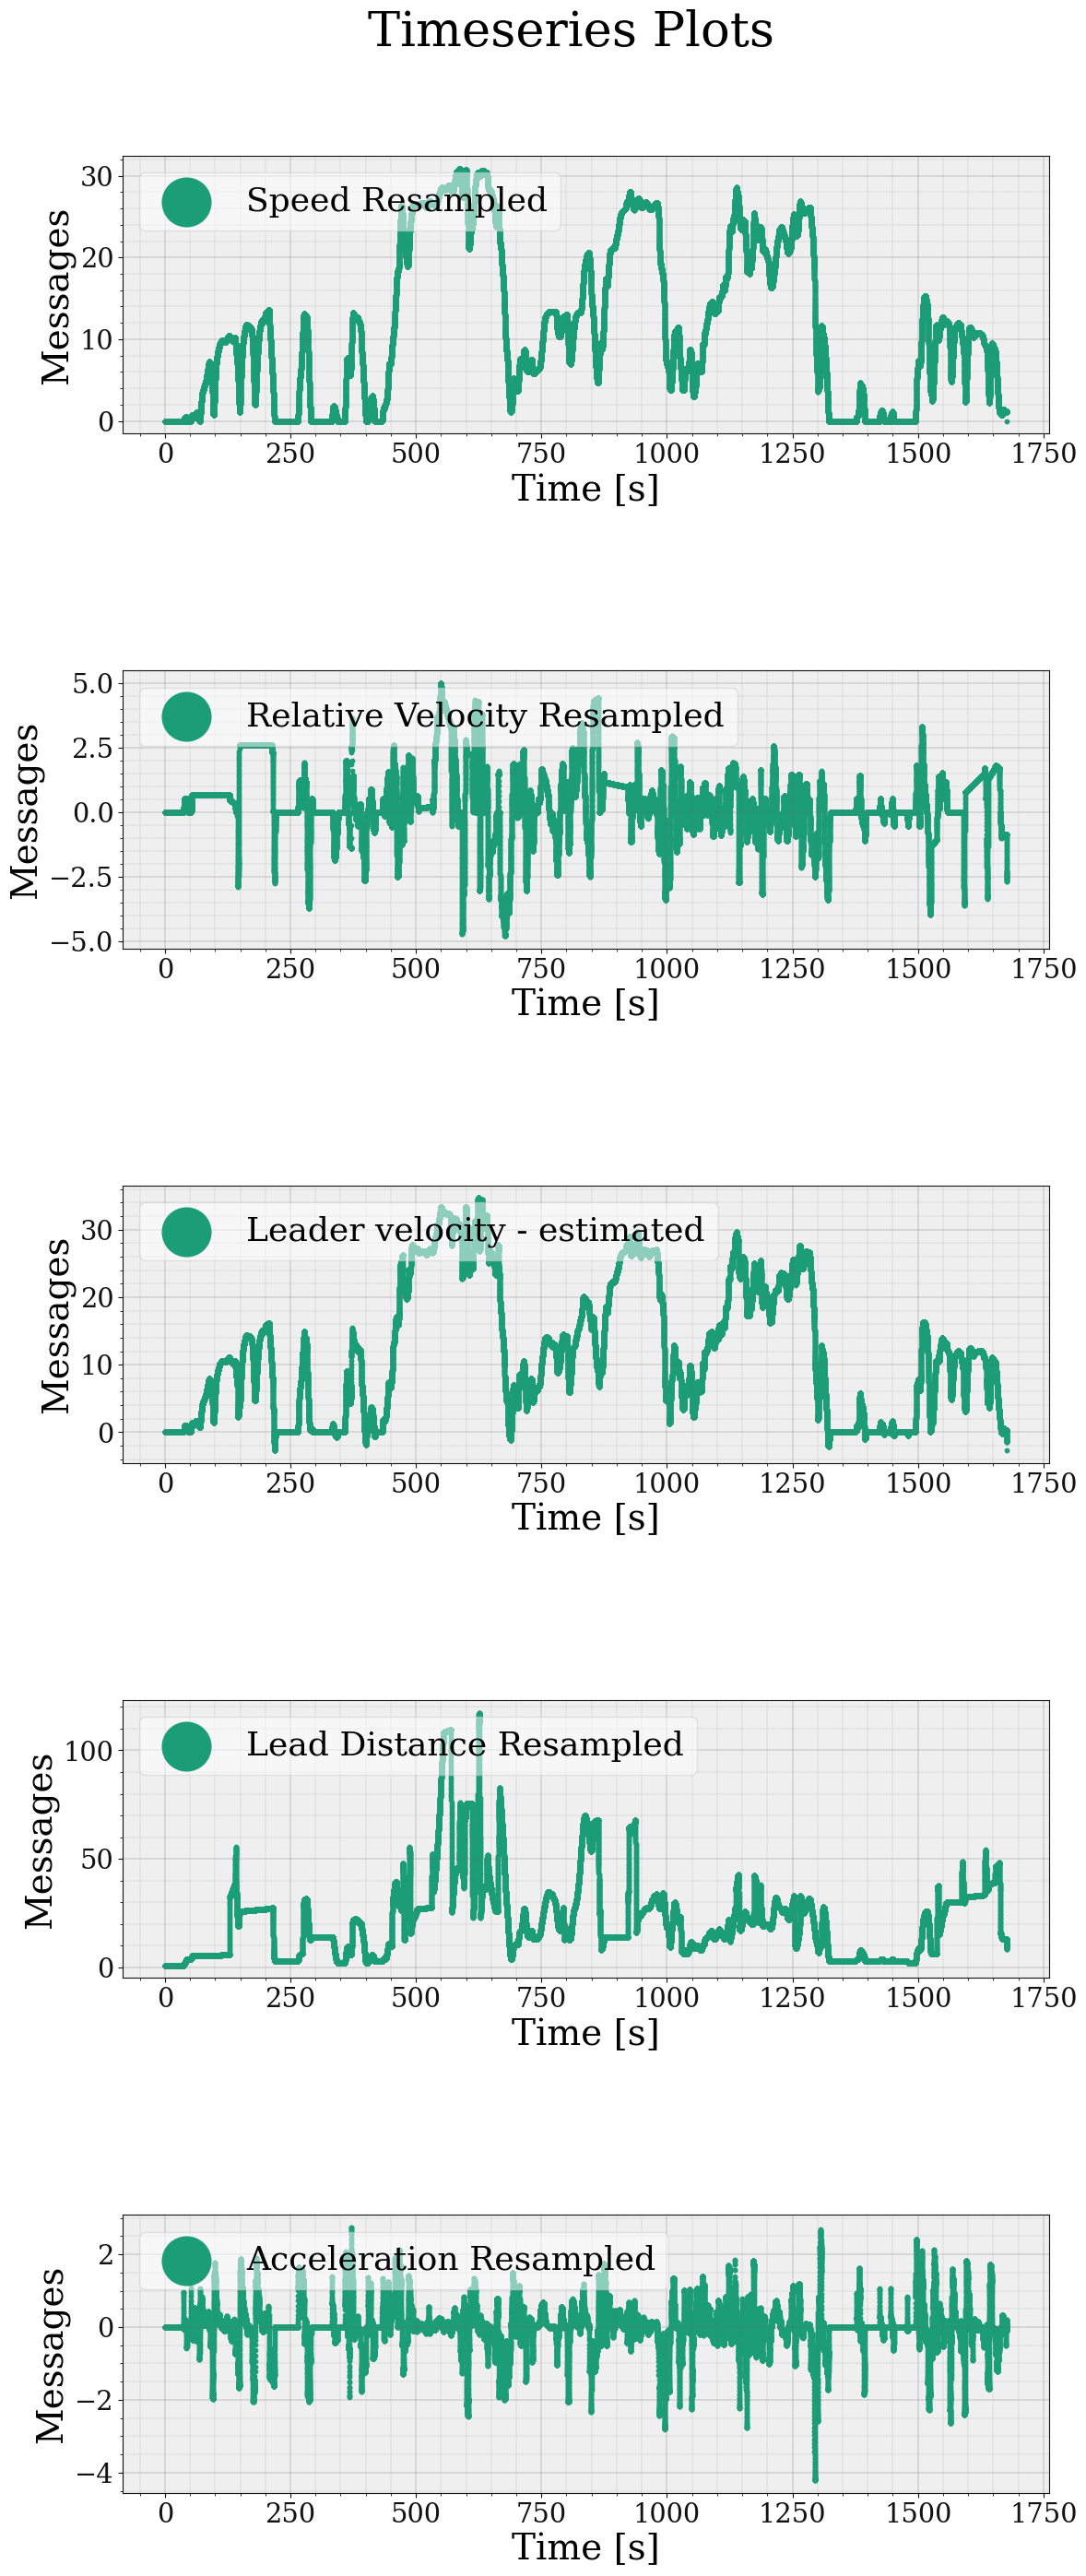

In [27]:
strymread.scatterts([speed_resampled, relative_vel_resampled, leader_vel, lead_dist_resampled, acceleration_resampled], 
                   labels=['Speed Resampled', 'Relative Velocity Resampled', 'Leader velocity - estimated', 'Lead Distance Resampled', 'Acceleration Resampled'],
                   stacked=False)

## Not the estimation of leader velocity still needs some refinement as if observed closely, for a few time steps, estimated velocity of the leader is zero.

## Now, things look good, let's just write to data file

In [18]:
data_to_import = pd.DataFrame()
data_to_import['Time'] = speed_resampled['Time'].values
data_to_import['speed'] = speed_resampled['Message'].values
data_to_import['lead_dist'] = lead_dist_resampled['Message'].values
data_to_import['relative_vel'] = relative_vel_resampled['Message'].values
data_to_import['acceleration'] = acceleration_resampled['Message'].values
data_to_import.to_csv('2020_07_08.csv')